import important libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sn

#Load Dataset

In [47]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

Convert Date Columns To datetime

In [45]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

#Overview Of Datasets

In [44]:
print("Customers Dataset Overview")
print(customers.info())
print(customers.describe(include='all'))

Customers Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
2

In [49]:
print("\nProducts Dataset Overview")
print(products.info())
print(products.describe(include='all'))


Products Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%         

In [48]:
print("\nTransactions Dataset Overview")
print(transactions.info())
print(transactions.describe(include='all'))


Transactions Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
       TransactionID CustomerID ProductID      TransactionDate     Quantity  \
count           1000       1000      1000                 1000  1000.000000   
unique          1000        199       100                 1000          NaN   
top           T00001      C0109      P059  2024-08-25 12:38:23          NaN   
freq               1         11        19                    1    

Exploring Data in pandas

In [55]:
# print(customers.head(10))
# print(customers.tail(10))

Missing Values Check [Ensure Data Integrity]

In [43]:
print("\nMissing Values:")
print("Customers:\n", customers.isnull().sum())
print("Products:\n", products.isnull().sum())
print("Transactions:\n", transactions.isnull().sum())


Missing Values:
Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


3. Basic Analysis (Analyzes unique counts, revenue, or transaction details) :

Customers :

In [50]:
print("\nNumber of unique customers:", customers['CustomerID'].nunique())
print(customers['Region'].value_counts())


Number of unique customers: 200
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


Product Data

In [41]:
print("\nNumber of unique products:", products['ProductID'].nunique())
print(products['Category'].value_counts())


Number of unique products: 100
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


Transactions Data

In [17]:
print("\nNumber of transactions:", transactions['TransactionID'].nunique())
print("Total revenue generated: $", transactions['TotalValue'].sum())
print("Average transaction value: $", transactions['TotalValue'].mean())

Visualizations :

Top 10 Products by Revenue :

Customers by Region :

Text(0, 0.5, 'Count')

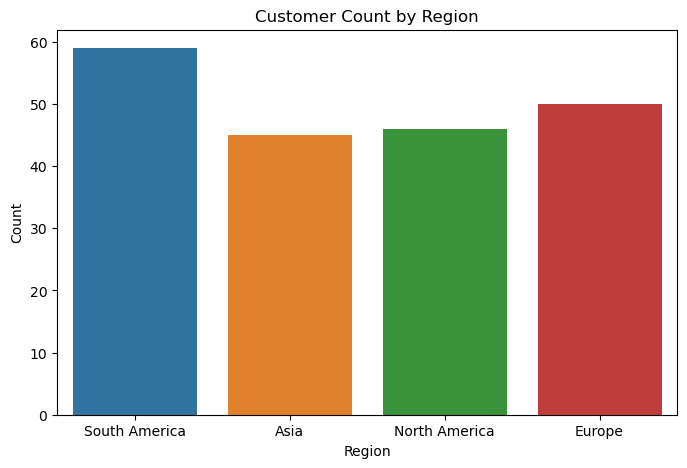

In [40]:
pt.figure(figsize=(8, 5))
sn.countplot(data=customers, x='Region')
pt.title("Customer Count by Region")
pt.xlabel("Region")
pt.ylabel("Count")
# pt.show()

Top 10 Products by Revenue

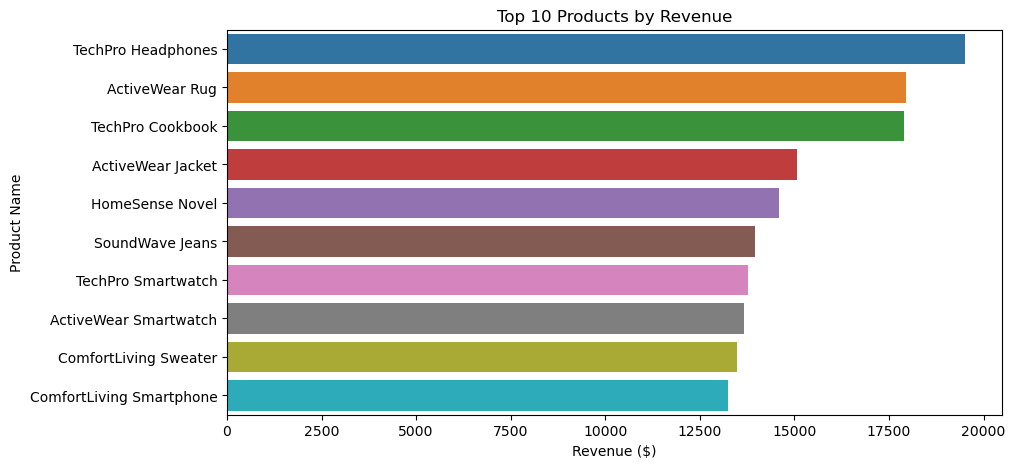

In [29]:
top_products= (transactions.groupby('ProductID')['TotalValue']
                .sum()
                .reset_index()
                .merge(products, on='ProductID')
                .sort_values(by='TotalValue', ascending=False)
                .head(10))
pt.figure(figsize=(10, 5))
sn.barplot(data=top_products, y='ProductName', x='TotalValue')
pt.title("Top 10 Products by Revenue")
pt.xlabel("Revenue ($)")
pt.ylabel("Product Name")
pt.show()

Transactions over time

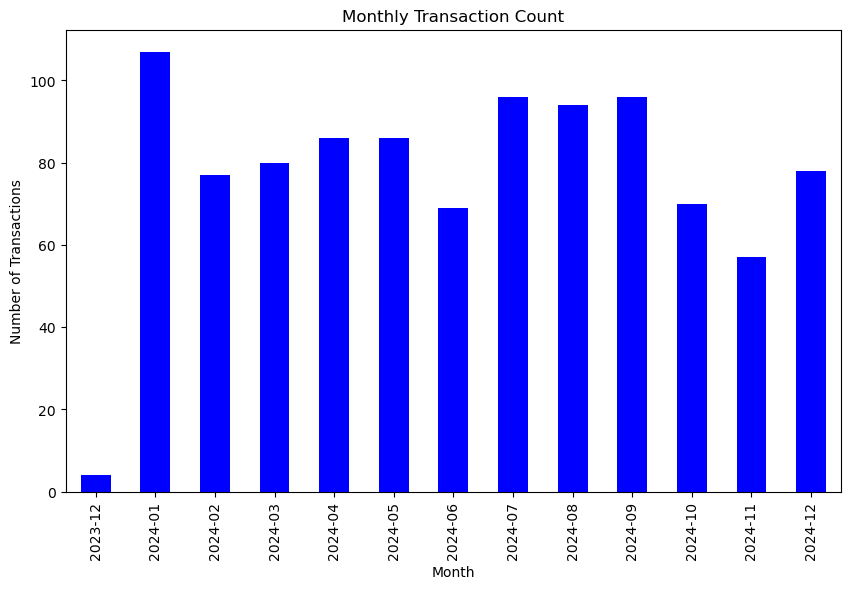

In [38]:
transactions['TransactionDate'].dt.to_period("M").value_counts().sort_index().plot(
    kind='bar', figsize=(10, 6), color='Blue'
)
pt.title("Monthly Transaction Count")
pt.xlabel("Month")
pt.ylabel("Number of Transactions")
pt.show()

5. Derive Business Insights

In [39]:
print("\nBusiness Insights:")
print("1. Customers from {} are the majority.".format(customers['Region'].mode()[0]))
print("2. The top revenue-generating product is {}.".format(top_products.iloc[0]['ProductName']))
print("3. Total revenue generated is ${:,.2f}.".format(transactions['TotalValue'].sum()))
print("4. {} products account for the top 10% of revenue.".format(len(top_products)))
print("5. The number of transactions peaked in {}.".format(
    transactions['TransactionDate'].dt.to_period("M").value_counts().idxmax()
))


Business Insights:
1. Customers from South America are the majority.
2. The top revenue-generating product is TechPro Headphones.
3. Total revenue generated is $689,995.56.
4. 10 products account for the top 10% of revenue.
5. The number of transactions peaked in 2024-01.
